In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

df = pd.read_csv("/content/drive/MyDrive/Datasets/Customer Churn.csv")

df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Customer Churn.csv")
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# df.duplicated("customerID").sum()
df["customerID"].duplicated().sum()

np.int64(0)

converte 0 and 1 values of senior citizen into yes and no

In [ ]:
def conv(value):
  if value==1:
    return "Yes"
  else:
    return "No"

df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


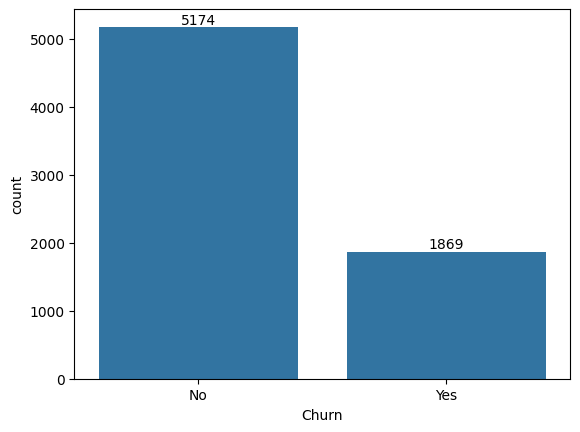

In [ ]:
a=sns.countplot(x=df['Churn'], data=df)
a.bar_label(a.containers[0])
plt.show()

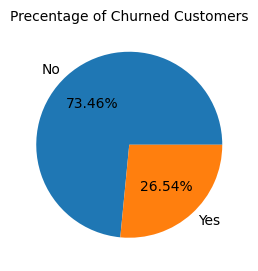

In [ ]:
plt.figure(figsize=(3,4))
gp=df.groupby("Churn").agg({"Churn":"count"})
gp
plt.pie(gp["Churn"],labels=gp.index, autopct="%1.2f%%" )
plt.title("Precentage of Churned Customers", fontsize=10)
plt.show()

Form the given pie chart we can conclude that 26.54% of our customer have churned out

Now let's explore the reason behind it.



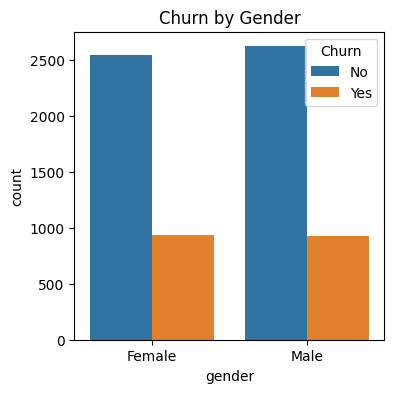

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(x="gender", data=df, hue="Churn")
plt.title("Churn by Gender")
plt.show()

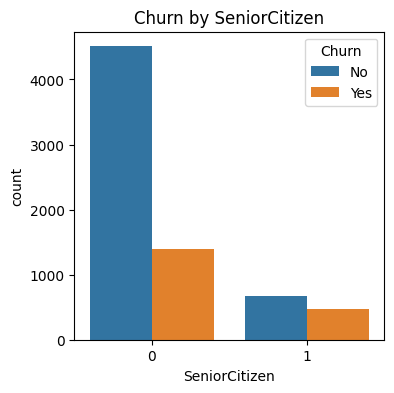

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(x="SeniorCitizen", data=df, hue="Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

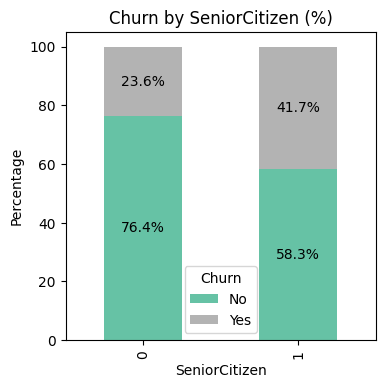

In [ ]:
ct = pd.crosstab(df["SeniorCitizen"], df["Churn"])
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

ax = ct_pct.plot(kind="bar", stacked=True, figsize=(4,4), colormap="Set2")

for c in ax.containers:
    ax.bar_label(c, fmt="%.1f%%", label_type="center")

plt.title("Churn by SeniorCitizen (%)")
plt.ylabel("Percentage")
plt.xlabel("SeniorCitizen")
plt.legend(title="Churn")
plt.show()

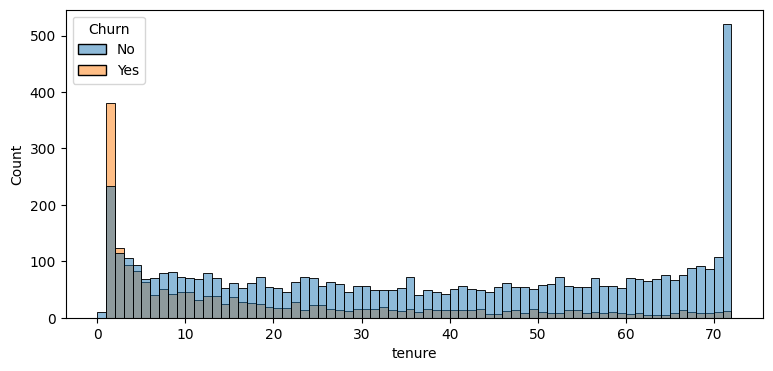

In [ ]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure", data=df, hue="Churn", bins=72)
plt.show()

People who have used our services for a long time have stayed and people who have used our services 1 or 2 months have churned

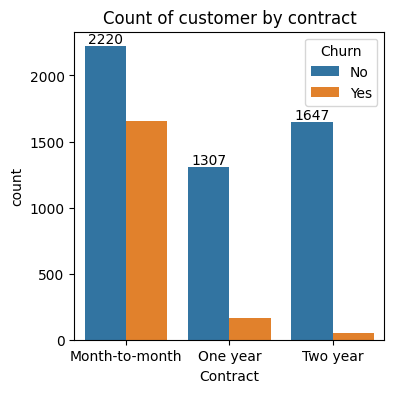

In [ ]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customer by contract")
plt.show()

People who have month to month contract are likely to churn then from those who have 1 or 2 year or contract

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

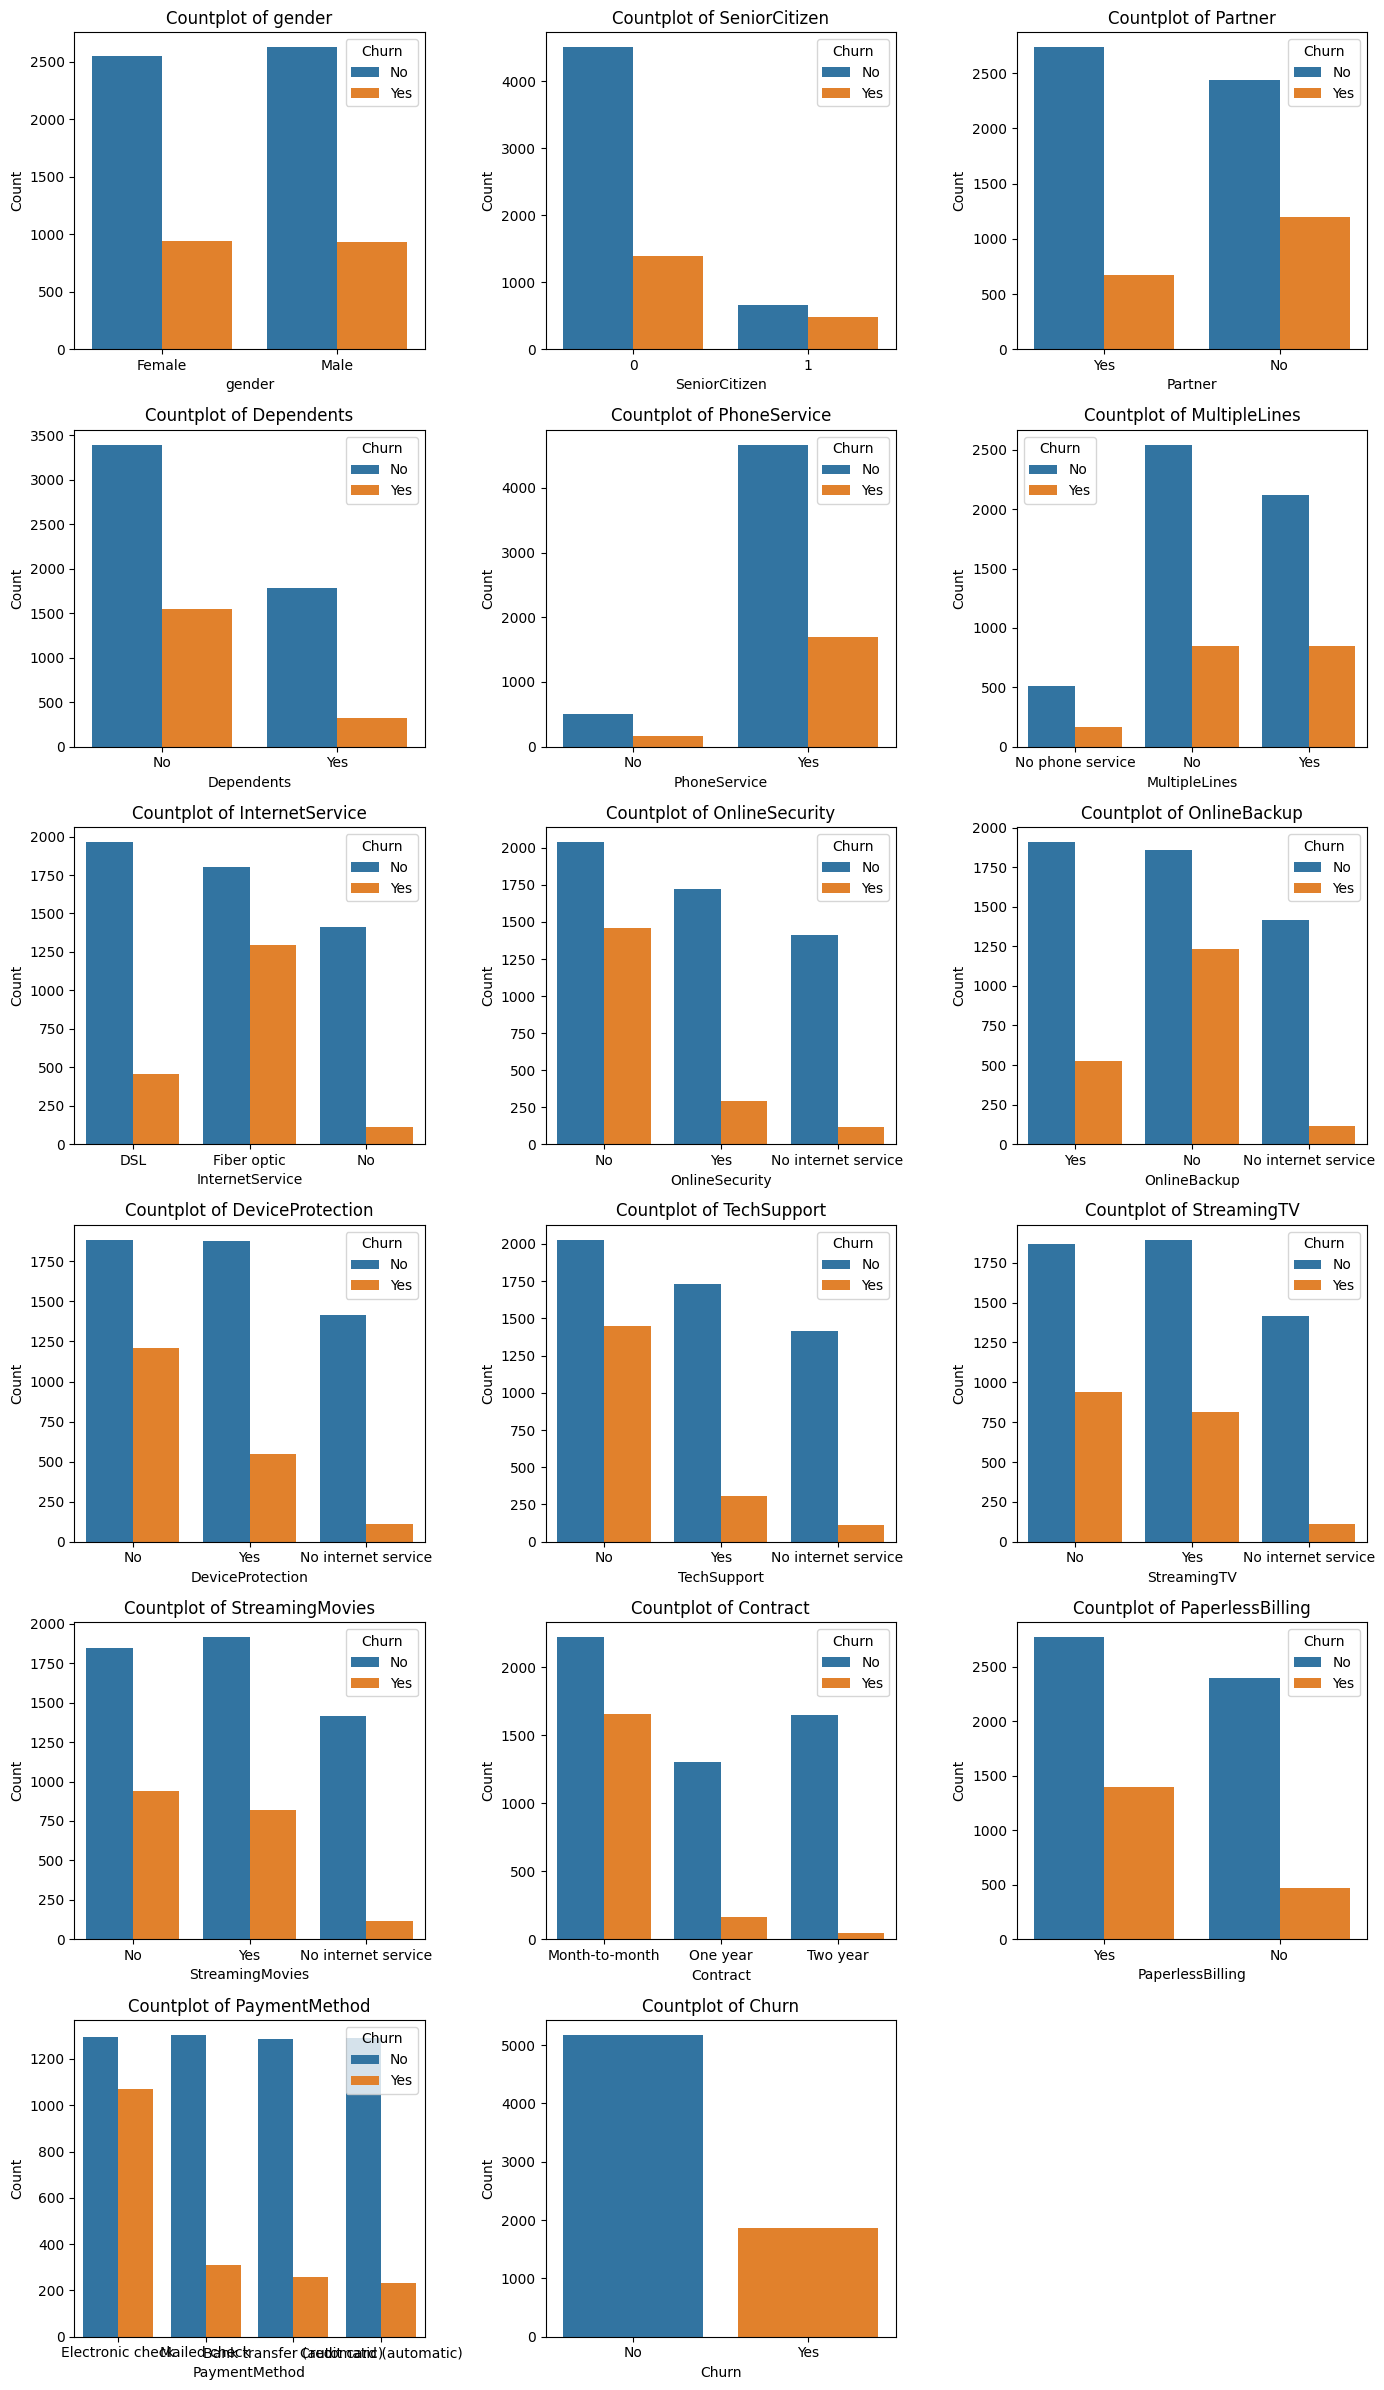

In [ ]:

categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

n = len(categorical_cols)

rows = (n // 3) + 1
fig, axes = plt.subplots(rows, 3, figsize=(14, rows * 4))

axes = axes.flatten()


for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i], hue=df["Churn"])
    axes[i].set_title(f"Countplot of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Most customers in the dataset did not churn, showing a clear class imbalance where “No” responses dominate over “Yes.” Senior Citizens and customers without partners or dependents were found to churn more often, highlighting the impact of personal demographics. Customers using Fiber optic internet churn more compared to those with DSL or no internet service, suggesting service type influences retention. The absence of OnlineSecurity, TechSupport, DeviceProtection, or OnlineBackup is strongly associated with higher churn, indicating that lack of support services drives customers away. Month-to-month contracts show very high churn, whereas two-year contracts display very low churn, making contract length a critical retention factor. Paperless billing customers also tend to churn more, while those paying through electronic checks show the highest churn compared to credit card or bank transfer users. On the other hand, streaming services (TV and Movies) and gender show little to no strong impact on churn, making them less significant compared to contract type, internet services, and payment method.

---



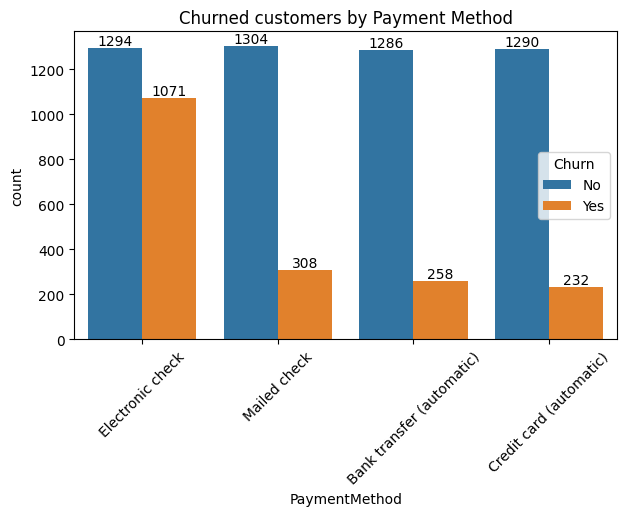

In [34]:
plt.figure(figsize=(7,4))
ax=sns.countplot(x="PaymentMethod", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned customers by Payment Method")
plt.xticks(rotation=45)
plt.show()

Customer is likely to churn when he is using electronic checks as payment method